<a href="https://colab.research.google.com/github/HeberBernal/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [42]:
import pandas as pd
import numpy as np


url = "https://github.com/alura-cursos/challenge2-data-science-LATAM/raw/main/TelecomX_Data.json"
df_raw = pd.read_json(url)

def flatten_df(df, sep="_"):
    df = df.copy()


    list_cols = [c for c in df.columns
                 if df[c].apply(lambda x: isinstance(x, list)).any()]
    for col in list_cols:
        df = df.explode(col, ignore_index=True)


    while True:
        dict_cols = [c for c in df.columns
                     if df[c].apply(lambda x: isinstance(x, dict)).any()]
        if not dict_cols:
            break

        for col in dict_cols:
            norm = (
                pd.json_normalize(df[col])
                  .add_prefix(f"{col}{sep}")
            )
            df = pd.concat(
                [df.drop(columns=[col]).reset_index(drop=True),
                 norm.reset_index(drop=True)],
                axis=1
            )
    return df


df_flat = flatten_df(df_raw)


df_flat['account_Charges.Total'] = (
    df_flat['account_Charges.Total']
        .replace(r'^\s*$', np.nan, regex=True)
        .astype(float)
)


rename_cols = {
    'index': 'INDICE',
    'customerID': 'ID_CLIENTE',
    'Churn': 'CHURN',
    'customer_gender': 'GENERO_CLIENTE',
    'customer_SeniorCitizen': 'CLIENTE_SENIOR',
    'customer_Partner': 'CLIENTE_PARTNER',
    'customer_Dependents': 'CLIENTE_DEPENDIENTE',
    'customer_tenure': 'ANTIGUEDAD_CLIENTE',
    'phone_PhoneService': 'SERVICIO_TELEFONO',
    'phone_MultipleLines': 'MULTIPLES_LINEAS',
    'internet_InternetService': 'SERVICIO_INET',
    'internet_OnlineSecurity': 'SEGURIDAD_ONLINE',
    'internet_OnlineBackup': 'RESPALDO_ONLINE',
    'internet_DeviceProtection': 'PROTECCION_DISPOSITIVOS',
    'internet_TechSupport': 'SOPORTE_TECNICO',
    'internet_StreamingTV': 'STREAMING',
    'internet_StreamingMovies': 'PELICULAS_STREAMING',
    'account_Contract': 'CONTRATO',
    'account_PaperlessBilling': 'BOLETA_ELECTRONICA',
    'account_PaymentMethod': 'METODO_PAGO',
    'account_Charges.Monthly': 'CARGO_MENSUAL',
    'account_Charges.Total': 'CARGO_TOTAL'
}

df_flat.rename(columns=rename_cols, inplace=True)
if 'INDICE' in df_flat.columns:

    df_flat.set_index('INDICE', inplace=True, drop=True)

df_flat.to_parquet("telecomx_flat_renombrado.parquet", index=False)
churn_total = df_flat['CHURN'].sum()
df_flat['CHURN'] = df_flat['CHURN'].map({'Yes': 1, 'No': 0})

churn_total = df_flat['CHURN'].sum()
churn_total_porcentaje = (churn_total / len(df_flat)) * 100

df_flat.head()

df_no_churn = df_flat[df_flat['CHURN'] == 0]
df_churn = df_flat[df_flat['CHURN'] == 1]
no_churn_total = len(df_no_churn)
no_churn_pct   = no_churn_total / len(df_flat) * 100

nulos_churn = df_flat['CHURN'].isna().sum()

df_clean = df_flat.dropna(subset=['CHURN'])

total_clean = len(df_clean)
activos_pct = (df_clean['CHURN'] == 0).sum() / total_clean * 100
cancelados_pct = (df_clean['CHURN'] == 1).sum() / total_clean * 100

print(f"Filas tras limpieza: {total_clean}")
print(f"Activos:    {activos_pct:.2f}%")
print(f"Cancelados: {cancelados_pct:.2f}%")
print(f"Suma total: {(activos_pct + cancelados_pct):.2f}%")
df_no_churn.head()


Filas tras limpieza: 7043
Activos:    73.46%
Cancelados: 26.54%
Suma total: 100.00%


,ID_CLIENTE,CHURN,GENERO_CLIENTE,CLIENTE_SENIOR,CLIENTE_PARTNER,CLIENTE_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,SERVICIO_INET,...,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
5,0013-MHZWF,0.0,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,0.0,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,0.0,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80


In [41]:
def flatten_df(df, sep="_"):
    df = df.copy()
    list_cols = [c for c in df.columns
                 if df[c].apply(lambda x: isinstance(x, list)).any()]
    for col in list_cols:
        df = df.explode(col, ignore_index=True)
    while True:
        dict_cols = [c for c in df.columns
                     if df[c].apply(lambda x: isinstance(x, dict)).any()]
        if not dict_cols:
            break
        for col in dict_cols:
            norm = (
                pd.json_normalize(df[col])
                  .add_prefix(f"{col}{sep}")
            )
            df = pd.concat(
                [df.drop(columns=[col]).reset_index(drop=True),
                 norm.reset_index(drop=True)],
                axis=1
            )
    return df

df_flat = flatten_df(df_raw)

df_flat['account_Charges.Total'] = (
    df_flat['account_Charges.Total']
        .replace(r'^\s*$', np.nan, regex=True)
        .astype(float)
)

rename_cols = {
    'index': 'INDICE',
    'customerID': 'ID_CLIENTE',
    'Churn': 'CHURN',
    'customer_gender': 'GENERO_CLIENTE',
    'customer_SeniorCitizen': 'CLIENTE_SENIOR',
    'customer_Partner': 'CLIENTE_PARTNER',
    'customer_Dependents': 'CLIENTE_DEPENDIENTE',
    'customer_tenure': 'ANTIGUEDAD_CLIENTE',
    'phone_PhoneService': 'SERVICIO_TELEFONO',
    'phone_MultipleLines': 'MULTIPLES_LINEAS',
    'internet_InternetService': 'SERVICIO_INET',
    'internet_OnlineSecurity': 'SEGURIDAD_ONLINE',
    'internet_OnlineBackup': 'RESPALDO_ONLINE',
    'internet_DeviceProtection': 'PROTECCION_DISPOSITIVOS',
    'internet_TechSupport': 'SOPORTE_TECNICO',
    'internet_StreamingTV': 'STREAMING',
    'internet_StreamingMovies': 'PELICULAS_STREAMING',
    'account_Contract': 'CONTRATO',
    'account_PaperlessBilling': 'BOLETA_ELECTRONICA',
    'account_PaymentMethod': 'METODO_PAGO',
    'account_Charges.Monthly': 'CARGO_MENSUAL',
    'account_Charges.Total': 'CARGO_TOTAL'
}

df_flat.rename(columns=rename_cols, inplace=True)
if 'INDICE' in df_flat.columns:
    df_flat.set_index('INDICE', inplace=True, drop=True)

df_flat['CHURN'] = df_flat['CHURN'].map({'Yes': 1, 'No': 0})
df_clean = df_flat.dropna(subset=['CHURN']).copy()


# --- CÓDIGO DE VERIFICACIÓN DE CALIDAD ---

print("### 1. Conteo de valores nulos por columna ###")
print(df_clean.isnull().sum())
print("\n" + "---" + "\n")

print("### 2. Conteo de filas duplicadas ###")
print(f"Número de filas duplicadas: {df_clean.duplicated().sum()}")
print("\n" + "---" + "\n")

print("### 3. Valores únicos en columnas categóricas clave ###")
categorical_cols = ['GENERO_CLIENTE', 'CLIENTE_SENIOR', 'CLIENTE_PARTNER', 'CLIENTE_DEPENDIENTE',
                    'SERVICIO_TELEFONO', 'MULTIPLES_LINEAS', 'SERVICIO_INET', 'CONTRATO',
                    'BOLETA_ELECTRONICA', 'METODO_PAGO']

for col in categorical_cols:
    print(f"Valores únicos en '{col}':")
    print(df_clean[col].unique())
    print("-" * 20)

### 1. Conteo de valores nulos por columna ###
ID_CLIENTE                  0
CHURN                       0
GENERO_CLIENTE              0
CLIENTE_SENIOR              0
CLIENTE_PARTNER             0
CLIENTE_DEPENDIENTE         0
ANTIGUEDAD_CLIENTE          0
SERVICIO_TELEFONO           0
MULTIPLES_LINEAS            0
SERVICIO_INET               0
SEGURIDAD_ONLINE            0
RESPALDO_ONLINE             0
PROTECCION_DISPOSITIVOS     0
SOPORTE_TECNICO             0
STREAMING                   0
PELICULAS_STREAMING         0
CONTRATO                    0
BOLETA_ELECTRONICA          0
METODO_PAGO                 0
CARGO_MENSUAL               0
CARGO_TOTAL                11
dtype: int64

---

### 2. Conteo de filas duplicadas ###
Número de filas duplicadas: 0

---

### 3. Valores únicos en columnas categóricas clave ###
Valores únicos en 'GENERO_CLIENTE':
['Female' 'Male']
--------------------
Valores únicos en 'CLIENTE_SENIOR':
[0 1]
--------------------
Valores únicos en 'CLIENTE_PARTNER':

#🔧 Transformación

In [40]:
import pandas as pd
import numpy as np

# 1. Cargar y aplanar los datos desde la URL
# La URL y la función de aplanamiento son las mismas que usaste
url = "https://github.com/alura-cursos/challenge2-data-science-LATAM/raw/main/TelecomX_Data.json"
df_raw = pd.read_json(url)

def flatten_df(df, sep="_"):
    df = df.copy()
    list_cols = [c for c in df.columns
                 if df[c].apply(lambda x: isinstance(x, list)).any()]
    for col in list_cols:
        df = df.explode(col, ignore_index=True)
    while True:
        dict_cols = [c for c in df.columns
                     if df[c].apply(lambda x: isinstance(x, dict)).any()]
        if not dict_cols:
            break
        for col in dict_cols:
            norm = (
                pd.json_normalize(df[col])
                  .add_prefix(f"{col}{sep}")
            )
            df = pd.concat(
                [df.drop(columns=[col]).reset_index(drop=True),
                 norm.reset_index(drop=True)],
                axis=1
            )
    return df

df_flat = flatten_df(df_raw)

# 2. Limpiar y renombrar las columnas
df_flat['account_Charges.Total'] = (
    df_flat['account_Charges.Total']
        .replace(r'^\s*$', np.nan, regex=True)
        .astype(float)
)


df_flat.rename(columns=rename_cols, inplace=True)

# Manejar nulos en 'CHURN' y convertir a binario
df_flat['CHURN'] = df_flat['CHURN'].map({'Yes': 1, 'No': 0})
df_clean = df_flat.dropna(subset=['CHURN']).copy()

# 3. Crear la columna "Cuentas_Diarias"
# Se calcula dividiendo el cargo mensual por un promedio de 30 días
df_clean['Cuentas_Diarias'] = df_clean['CARGO_MENSUAL'] / 30

# 4. Mostrar las primeras filas para verificar el resultado
print(df_clean[['CARGO_MENSUAL', 'Cuentas_Diarias']].head())

   CARGO_MENSUAL  Cuentas_Diarias
0           65.6         2.186667
1           59.9         1.996667
2           73.9         2.463333
3           98.0         3.266667
4           83.9         2.796667


#📊 Carga y análisis

--- Análisis Descriptivo de las Columnas Numéricas ---
       ANTIGUEDAD_CLIENTE  CARGO_MENSUAL  CARGO_TOTAL  Cuentas_Diarias
count         7043.000000    7043.000000  7032.000000      7043.000000
mean            32.371149      64.761692  2283.300441         2.158723
std             24.559481      30.090047  2266.771362         1.003002
min              0.000000      18.250000    18.800000         0.608333
25%              9.000000      35.500000   401.450000         1.183333
50%             29.000000      70.350000  1397.475000         2.345000
75%             55.000000      89.850000  3794.737500         2.995000
max             72.000000     118.750000  8684.800000         3.958333
--- Análisis Descriptivo de las Columnas Numéricas ---
       ANTIGUEDAD_CLIENTE  CARGO_MENSUAL  CARGO_TOTAL  Cuentas_Diarias
count         7043.000000    7043.000000  7032.000000      7043.000000
mean            32.371149      64.761692  2283.300441         2.158723
std             24.559481      30.0900

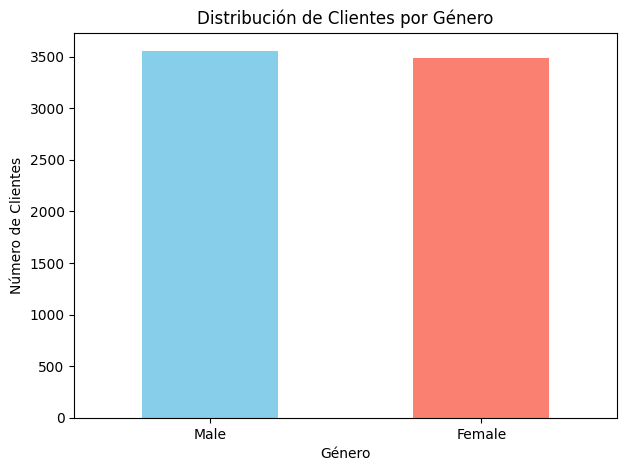

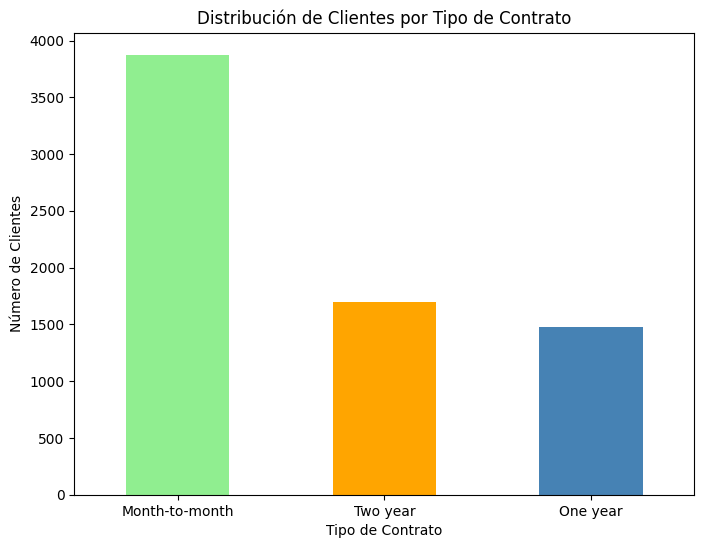

In [39]:
def flatten_df(df, sep="_"):
    df = df.copy()
    list_cols = [c for c in df.columns
                 if df[c].apply(lambda x: isinstance(x, list)).any()]
    for col in list_cols:
        df = df.explode(col, ignore_index=True)
    while True:
        dict_cols = [c for c in df.columns
                     if df[c].apply(lambda x: isinstance(x, dict)).any()]
        if not dict_cols:
            break
        for col in dict_cols:
            norm = (
                pd.json_normalize(df[col])
                  .add_prefix(f"{col}{sep}")
            )
            df = pd.concat(
                [df.drop(columns=[col]).reset_index(drop=True),
                 norm.reset_index(drop=True)],
                axis=1
            )
    return df

df_flat = flatten_df(df_raw)

df_flat['account_Charges.Total'] = (
    df_flat['account_Charges.Total']
        .replace(r'^\s*$', np.nan, regex=True)
        .astype(float)
)

df_flat.rename(columns=rename_cols, inplace=True)
if 'INDICE' in df_flat.columns:
    df_flat.set_index('INDICE', inplace=True, drop=True)

df_flat['CHURN'] = df_flat['CHURN'].map({'Yes': 1, 'No': 0})
df_clean = df_flat.dropna(subset=['CHURN']).copy()

# Crear la columna "Cuentas_Diarias"
df_clean['Cuentas_Diarias'] = df_clean['CARGO_MENSUAL'] / 30

# --- CÓDIGO PARA EL ANÁLISIS DESCRIPTIVO ---

# Realizar el análisis descriptivo de las columnas numéricas relevantes
descriptive_stats = df_clean[['ANTIGUEDAD_CLIENTE', 'CARGO_MENSUAL', 'CARGO_TOTAL', 'Cuentas_Diarias']].describe()

print("--- Análisis Descriptivo de las Columnas Numéricas ---")
print(descriptive_stats)

# --- CÓDIGO PARA EL ANÁLISIS DESCRIPTIVO ---

# Realizar el análisis descriptivo de las columnas numéricas relevantes
descriptive_stats = df_clean[['ANTIGUEDAD_CLIENTE', 'CARGO_MENSUAL', 'CARGO_TOTAL', 'Cuentas_Diarias']].describe()

print("--- Análisis Descriptivo de las Columnas Numéricas ---")
print(descriptive_stats)

print("--- Análisis Descriptivo de las Columnas Numéricas ---")
print(descriptive_stats)

df_flat = flatten_df(df_raw)

df_flat['account_Charges.Total'] = (
    df_flat['account_Charges.Total']
        .replace(r'^\s*$', np.nan, regex=True)
        .astype(float)
)

df_flat.rename(columns=rename_cols, inplace=True)
if 'INDICE' in df_flat.columns:
    df_flat.set_index('INDICE', inplace=True, drop=True)

df_flat['CHURN'] = df_flat['CHURN'].map({'Yes': 1, 'No': 0})
df_clean = df_flat.dropna(subset=['CHURN']).copy()

# --- CÓDIGO DE ANÁLISIS ---

# 1. Gráfico de barras para la distribución de clientes por género
gender_counts = df_clean['GENERO_CLIENTE'].value_counts()

plt.figure(figsize=(7, 5))
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

# 2. Gráfico de barras para la distribución de clientes por tipo de contrato
contract_counts = df_clean['CONTRATO'].value_counts()

plt.figure(figsize=(8, 6))
contract_counts.plot(kind='bar', color=['lightgreen', 'orange', 'steelblue'])
plt.title('Distribución de Clientes por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

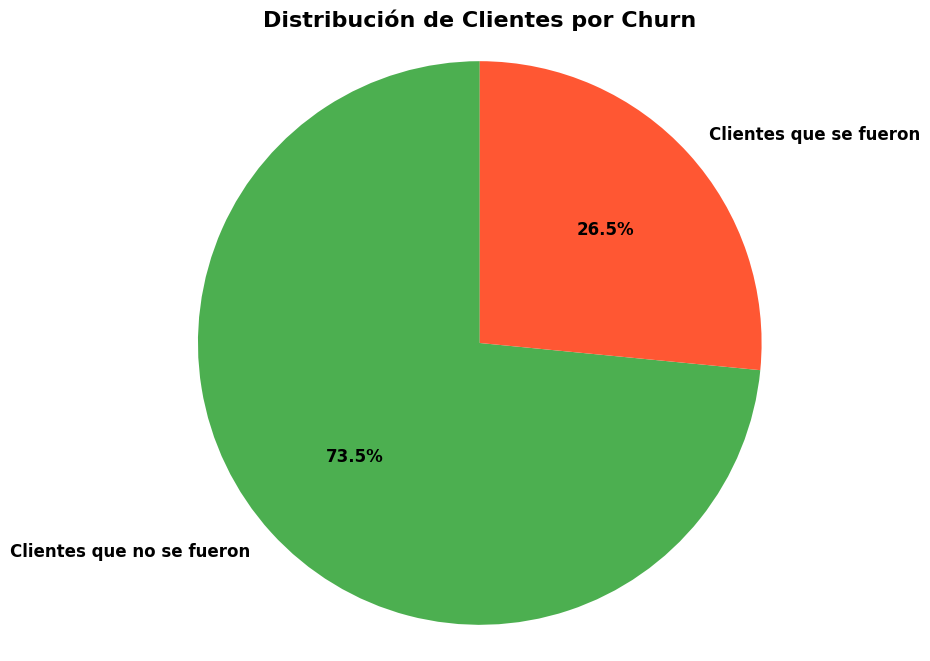


--- Conteo exacto de clientes ---
Clientes que no se fueron (0): 5174
Clientes que se fueron (1): 1869
Total de clientes: 7043


In [37]:

def flatten_df(df, sep="_"):
    df = df.copy()
    list_cols = [c for c in df.columns
                 if df[c].apply(lambda x: isinstance(x, list)).any()]
    for col in list_cols:
        df = df.explode(col, ignore_index=True)
    while True:
        dict_cols = [c for c in df.columns
                     if df[c].apply(lambda x: isinstance(x, dict)).any()]
        if not dict_cols:
            break
        for col in dict_cols:
            norm = (
                pd.json_normalize(df[col])
                  .add_prefix(f"{col}{sep}")
            )
            df = pd.concat(
                [df.drop(columns=[col]).reset_index(drop=True),
                 norm.reset_index(drop=True)],
                axis=1
            )
    return df

df_flat = flatten_df(df_raw)

df_flat['account_Charges.Total'] = (
    df_flat['account_Charges.Total']
        .replace(r'^\s*$', np.nan, regex=True)
        .astype(float)
)



df_flat.rename(columns=rename_cols, inplace=True)
if 'INDICE' in df_flat.columns:
    df_flat.set_index('INDICE', inplace=True, drop=True)

df_flat['CHURN'] = df_flat['CHURN'].map({'Yes': 1, 'No': 0})
df_clean = df_flat.dropna(subset=['CHURN']).copy()

# --- ANÁLISIS DE LA DISTRIBUCIÓN DE CHURN ---
# 1. Contar la cantidad de clientes que se fueron y los que se quedaron
churn_counts = df_clean['CHURN'].value_counts()

# 2. Definir las etiquetas y colores del gráfico
labels = ['Clientes que no se fueron', 'Clientes que se fueron']
colors = ['#4CAF50', '#FF5733'] # Verde para "No" y Naranja para "Sí"

# 3. Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        textprops={'fontsize': 12, 'color': 'black', 'weight': 'bold'})

plt.title('Distribución de Clientes por Churn', fontsize=16, fontweight='bold')
plt.axis('equal')  # Asegura que el círculo sea perfecto

plt.show()

# Opcional: imprimir los conteos exactos
print("\n--- Conteo exacto de clientes ---")
print("Clientes que no se fueron (0):", churn_counts[0])
print("Clientes que se fueron (1):", churn_counts[1])
print("Total de clientes:", len(df_clean))




In [36]:
def flatten_df(df, sep="_"):
    df = df.copy()
    list_cols = [c for c in df.columns
                 if df[c].apply(lambda x: isinstance(x, list)).any()]
    for col in list_cols:
        df = df.explode(col, ignore_index=True)
    while True:
        dict_cols = [c for c in df.columns
                     if df[c].apply(lambda x: isinstance(x, dict)).any()]
        if not dict_cols:
            break
        for col in dict_cols:
            norm = (
                pd.json_normalize(df[col])
                  .add_prefix(f"{col}{sep}")
            )
            df = pd.concat(
                [df.drop(columns=[col]).reset_index(drop=True),
                 norm.reset_index(drop=True)],
                axis=1
            )
    return df

df_flat = flatten_df(df_raw)

df_flat['account_Charges.Total'] = (
    df_flat['account_Charges.Total']
        .replace(r'^\s*$', np.nan, regex=True)
        .astype(float)
)


df_flat.rename(columns=rename_cols, inplace=True)
if 'INDICE' in df_flat.columns:
    df_flat.set_index('INDICE', inplace=True, drop=True)

df_flat['CHURN'] = df_flat['CHURN'].map({'Yes': 1, 'No': 0})
df_clean = df_flat.dropna(subset=['CHURN']).copy()

# --- CÓDIGO DE ANÁLISIS ---

# Lista de columnas categóricas para analizar
categorical_cols = ['GENERO_CLIENTE', 'CLIENTE_SENIOR', 'CLIENTE_PARTNER', 'CONTRATO', 'SERVICIO_INET', 'METODO_PAGO']

for col in categorical_cols:
    print(f"### Tasa de Churn por: '{col}' ###")
    churn_rate = df_clean.groupby(col)['CHURN'].mean()
    print(churn_rate.sort_values(ascending=False))
    print("\n" + "---" + "\n")

### Tasa de Churn por: 'GENERO_CLIENTE' ###
GENERO_CLIENTE
Female    0.269209
Male      0.261603
Name: CHURN, dtype: float64

---

### Tasa de Churn por: 'CLIENTE_SENIOR' ###
CLIENTE_SENIOR
1    0.416813
0    0.236062
Name: CHURN, dtype: float64

---

### Tasa de Churn por: 'CLIENTE_PARTNER' ###
CLIENTE_PARTNER
No     0.329580
Yes    0.196649
Name: CHURN, dtype: float64

---

### Tasa de Churn por: 'CONTRATO' ###
CONTRATO
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: CHURN, dtype: float64

---

### Tasa de Churn por: 'SERVICIO_INET' ###
SERVICIO_INET
Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: CHURN, dtype: float64

---

### Tasa de Churn por: 'METODO_PAGO' ###
METODO_PAGO
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: CHURN, dtype: float64

---



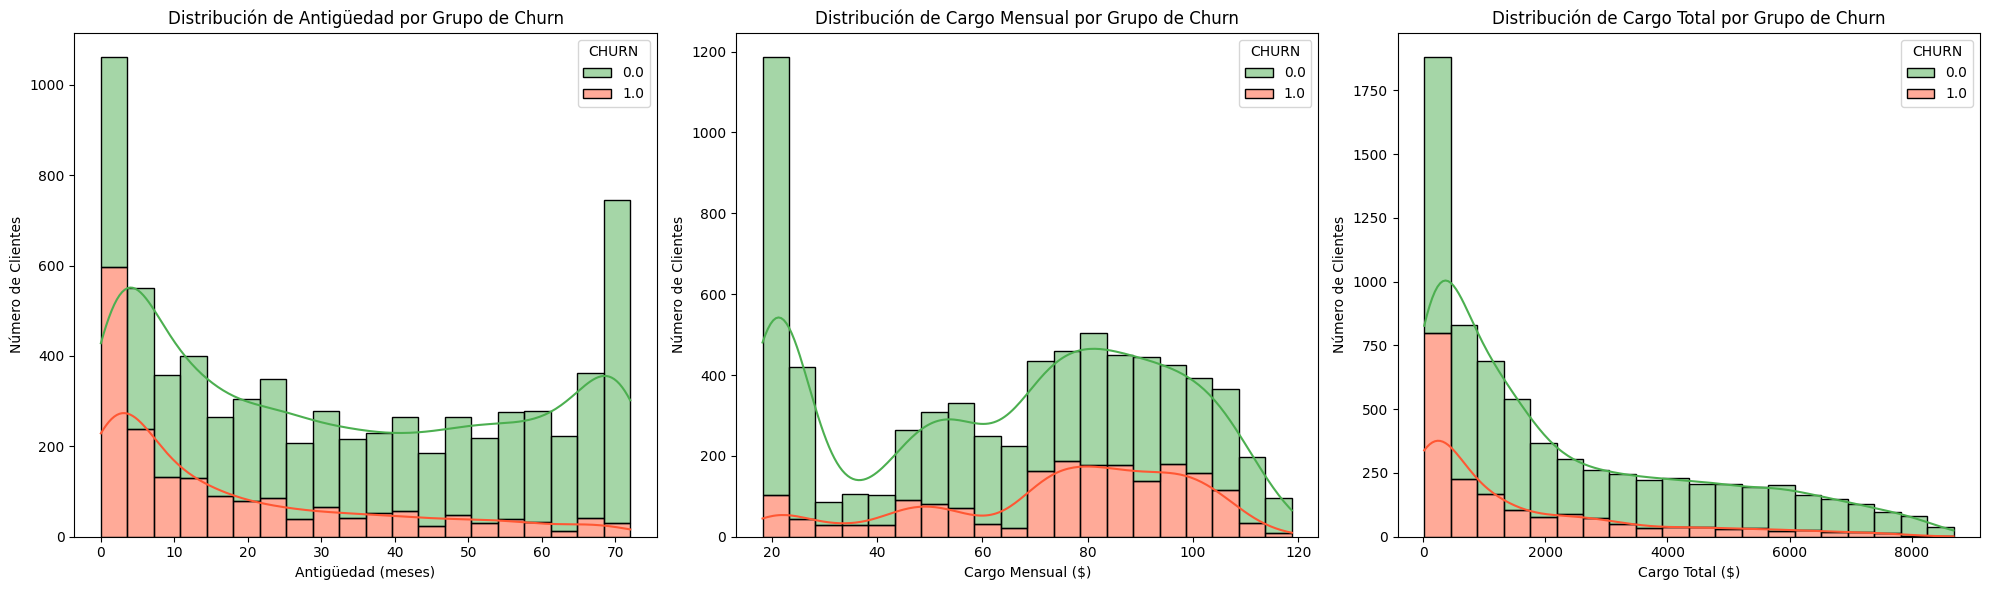

In [35]:


df_flat = flatten_df(df_raw)

df_flat['account_Charges.Total'] = (
    df_flat['account_Charges.Total']
        .replace(r'^\s*$', np.nan, regex=True)
        .astype(float)
)



df_flat.rename(columns=rename_cols, inplace=True)
if 'INDICE' in df_flat.columns:
    df_flat.set_index('INDICE', inplace=True, drop=True)

df_flat['CHURN'] = df_flat['CHURN'].map({'Yes': 1, 'No': 0})
df_clean = df_flat.dropna(subset=['CHURN']).copy()

# --- ANÁLISIS DE LAS VARIABLES NUMÉRICAS ---

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Histograma para la 'ANTIGUEDAD_CLIENTE'
sns.histplot(data=df_clean, x='ANTIGUEDAD_CLIENTE', hue='CHURN',
             multiple="stack", ax=ax[0], kde=True, bins=20,
             palette=['#4CAF50', '#FF5733'])
ax[0].set_title('Distribución de Antigüedad por Grupo de Churn')
ax[0].set_xlabel('Antigüedad (meses)')
ax[0].set_ylabel('Número de Clientes')

# Histograma para el 'CARGO_MENSUAL'
sns.histplot(data=df_clean, x='CARGO_MENSUAL', hue='CHURN',
             multiple="stack", ax=ax[1], kde=True, bins=20,
             palette=['#4CAF50', '#FF5733'])
ax[1].set_title('Distribución de Cargo Mensual por Grupo de Churn')
ax[1].set_xlabel('Cargo Mensual ($)')
ax[1].set_ylabel('Número de Clientes')

# Histograma para el 'CARGO_TOTAL'
sns.histplot(data=df_clean, x='CARGO_TOTAL', hue='CHURN',
             multiple="stack", ax=ax[2], kde=True, bins=20,
             palette=['#4CAF50', '#FF5733'])
ax[2].set_title('Distribución de Cargo Total por Grupo de Churn')
ax[2].set_xlabel('Cargo Total ($)')
ax[2].set_ylabel('Número de Clientes')

plt.tight_layout()
plt.show()


/tmp/ipython-input-1321610419.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CONTRATO', y='CHURN', data=df_clean, ax=ax[0], palette='viridis')
/tmp/ipython-input-1321610419.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='METODO_PAGO', y='CHURN', data=df_clean, ax=ax[1], palette='plasma')
/tmp/ipython-input-1321610419.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SERVICIO_INET', y='CHURN', data=df_clean, ax=ax[2], palette='magma')


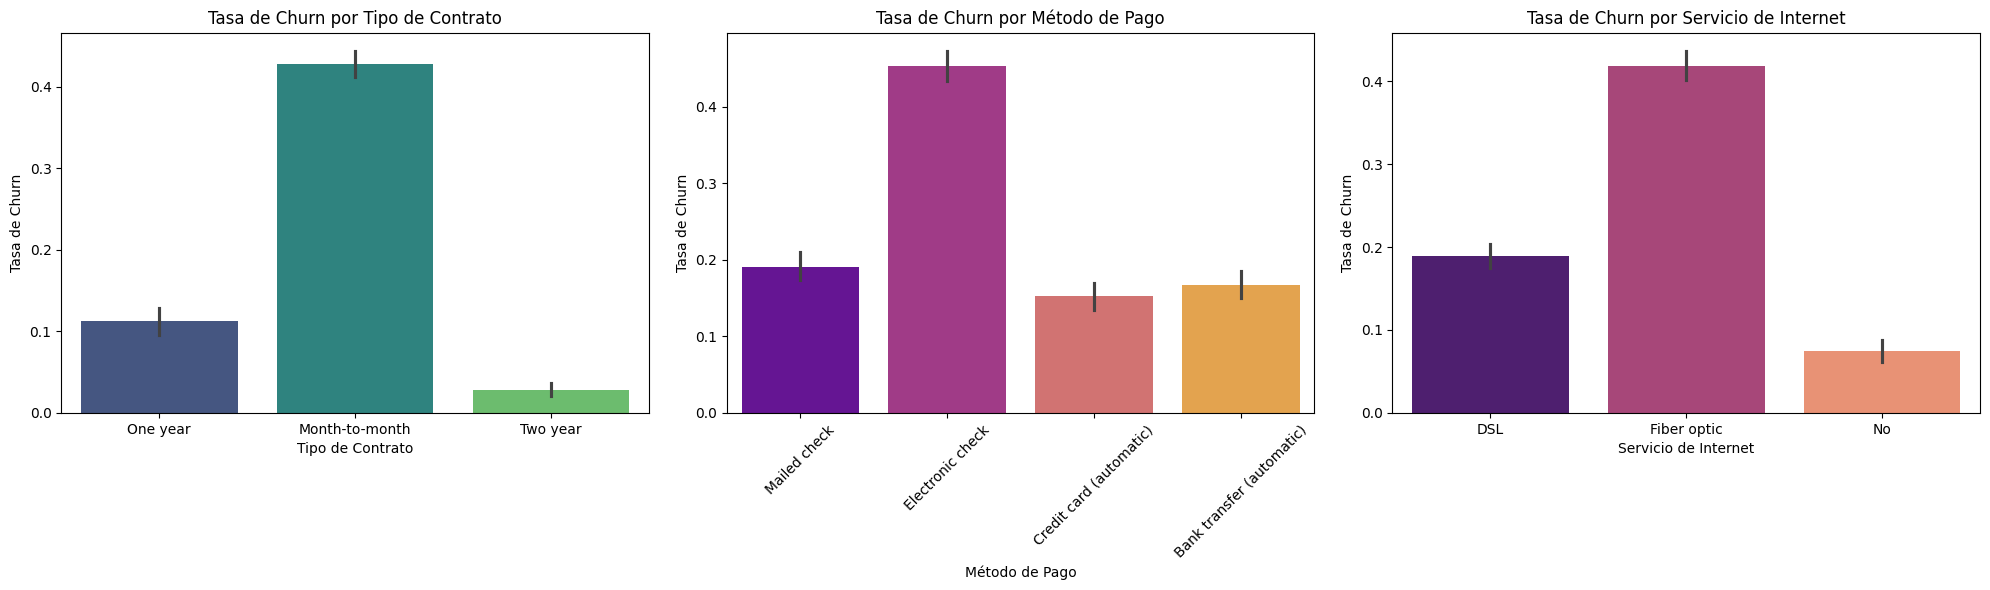

In [34]:
def flatten_df(df, sep="_"):
    df = df.copy()
    list_cols = [c for c in df.columns
                 if df[c].apply(lambda x: isinstance(x, list)).any()]
    for col in list_cols:
        df = df.explode(col, ignore_index=True)
    while True:
        dict_cols = [c for c in df.columns
                     if df[c].apply(lambda x: isinstance(x, dict)).any()]
        if not dict_cols:
            break
        for col in dict_cols:
            norm = (
                pd.json_normalize(df[col])
                  .add_prefix(f"{col}{sep}")
            )
            df = pd.concat(
                [df.drop(columns=[col]).reset_index(drop=True),
                 norm.reset_index(drop=True)],
                axis=1
            )
    return df

df_flat = flatten_df(df_raw)

df_flat['account_Charges.Total'] = (
    df_flat['account_Charges.Total']
        .replace(r'^\s*$', np.nan, regex=True)
        .astype(float)
)

rename_cols = {
    'index': 'INDICE',
    'customerID': 'ID_CLIENTE',
    'Churn': 'CHURN',
    'customer_gender': 'GENERO_CLIENTE',
    'customer_SeniorCitizen': 'CLIENTE_SENIOR',
    'customer_Partner': 'CLIENTE_PARTNER',
    'customer_Dependents': 'CLIENTE_DEPENDIENTE',
    'customer_tenure': 'ANTIGUEDAD_CLIENTE',
    'phone_PhoneService': 'SERVICIO_TELEFONO',
    'phone_MultipleLines': 'MULTIPLES_LINEAS',
    'internet_InternetService': 'SERVICIO_INET',
    'internet_OnlineSecurity': 'SEGURIDAD_ONLINE',
    'internet_OnlineBackup': 'RESPALDO_ONLINE',
    'internet_DeviceProtection': 'PROTECCION_DISPOSITIVOS',
    'internet_TechSupport': 'SOPORTE_TECNICO',
    'internet_StreamingTV': 'STREAMING',
    'internet_StreamingMovies': 'PELICULAS_STREAMING',
    'account_Contract': 'CONTRATO',
    'account_PaperlessBilling': 'BOLETA_ELECTRONICA',
    'account_PaymentMethod': 'METODO_PAGO',
    'account_Charges.Monthly': 'CARGO_MENSUAL',
    'account_Charges.Total': 'CARGO_TOTAL'
}

df_flat.rename(columns=rename_cols, inplace=True)
if 'INDICE' in df_flat.columns:
    df_flat.set_index('INDICE', inplace=True, drop=True)

df_flat['CHURN'] = df_flat['CHURN'].map({'Yes': 1, 'No': 0})
df_clean = df_flat.dropna(subset=['CHURN']).copy()

# --- ANÁLISIS DE LA TASA DE EVASIÓN POR CATEGORÍA ---
# Crear la figura y los subplots para los gráficos
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico 1: Tasa de Churn por Contrato
sns.barplot(x='CONTRATO', y='CHURN', data=df_clean, ax=ax[0], palette='viridis')
ax[0].set_title('Tasa de Churn por Tipo de Contrato')
ax[0].set_xlabel('Tipo de Contrato')
ax[0].set_ylabel('Tasa de Churn')

# Gráfico 2: Tasa de Churn por Método de Pago
sns.barplot(x='METODO_PAGO', y='CHURN', data=df_clean, ax=ax[1], palette='plasma')
ax[1].set_title('Tasa de Churn por Método de Pago')
ax[1].set_xlabel('Método de Pago')
ax[1].set_ylabel('Tasa de Churn')
ax[1].tick_params(axis='x', rotation=45)

# Gráfico 3: Tasa de Churn por Servicio de Internet
sns.barplot(x='SERVICIO_INET', y='CHURN', data=df_clean, ax=ax[2], palette='magma')
ax[2].set_title('Tasa de Churn por Servicio de Internet')
ax[2].set_xlabel('Servicio de Internet')
ax[2].set_ylabel('Tasa de Churn')

plt.tight_layout()
plt.show()

#📄Informe final